In [3]:
import pandas as pd

In [5]:
# hosts_no18s = pd.DataFrame(list(host_species))
# hosts_no18s.to_csv('hosts_without_classification.csv')
# hosts_no18s.set_index(0, inplace=True)

hosts_18s = pd.read_csv('hosts_with_classification-NH_EM_mods.csv', index_col='Species')
# set(hosts_18s['Genbank ID']) 

In [6]:
hosts_18s.fillna(0, inplace=True)
hosts_18s

,Index,Scientific Name,BOL URL,Sequence,Order,Family,Closest Species,Genbank ID,COI Genbank,TOL reference,Unnamed: 11
Species,,,,,,,,,,,
Horse,0,Equus ferus caballus,http://www.boldsystems.org/index.php/Public_Re...,AACTGCCCTAAGCCTCCTAATCCGTGCTGAATTAGGCCAACCTGGG...,Perissodactyla,Equidae,Equus caballus,AJ311673.1,0,0,0
American Green-Winged Teal,1,Anas carolinensis,http://www.boldsystems.org/index.php/Public_Re...,TCTATACCTTATCTTCGGGGCATGAGCCGGAATAATTGGCACAGCA...,Anseriformes,Anatidae,Anas platyrhynchos,AF173614.1,0,0,0
Unknown,2,0,0,0,0,0,0,0,0,0,0
Heron,3,Ardea cinerea,http://www.boldsystems.org/index.php/Public_Re...,ATCGGCACTTTATATCTAATCTTCGGAGCATGAGCCGGCATAATTG...,Pelecaniformes,Ardeidae,Larus glaucoides,AF173637.1,0,http://tolweb.org/Ardeidae/26331,Nearest: Charadriiformes
Grey Heron,4,Ardea cinerea,http://www.boldsystems.org/index.php/Public_Re...,ATCGGCACTTTATATCTAATCTTCGGAGCATGAGCCGGCATAATTG...,Pelecaniformes,Ardeidae,Larus glaucoides,AF173637.1,0,http://tolweb.org/Ardea/89636,Nearest: Charadriiformes
Whiskered Tern,5,Chlidonias hybrida,http://www.boldsystems.org/index.php/Public_Re...,GTGACCTTCATCAACCGATGATTATTTTCAACAAACCACAAAGATA...,Charadriiformes,Sternidae,Larus glaucoides,AF173637.1,0,0,0
Northern Shoveler,6,Anas clypeata,http://www.boldsystems.org/index.php/Public_Re...,GTGACCTTCATCAATCGATGACTATTCTCTACCAACCACAAAGACA...,Anseriformes,Anatidae,Anas platyrhynchos,AF173614.1,0,0,0
Redhead,7,Aythya americana,http://www.boldsystems.org/index.php/Public_Re...,AATCGATGATTATTCTCTACCAATCACAAAGACATCGGTACCCTAT...,Anseriformes,Anatidae,Anas platyrhynchos,AF173614.1,0,0,0
Murre,8,Uria aalge,http://www.boldsystems.org/index.php/Public_Re...,GGTACCCTGTATCTAATCTTTGGSGCATGAGCCGGTATAGTTGGTA...,Charadriiformes,Alcidae,Larus glaucoides,AF173637.1,0,0,0


In [7]:
# I have manually attached nearest available 18S rRNA sequence based on host species classification.
# Pending checks from Nichola. Meanwhile, nothing is stopping me from developing the code that will
# automate the downloading of 18S rRNA sequences based on the GenBank accessions grabbed.
# from Bio import Entrez, SeqIO
# Entrez.email = 'ericmjl@mit.edu'

# ribosomal_18s = []
# for gb_identifier in set(hosts_18s['Genbank ID']):
#     if isinstance(gb_identifier, str):
#         handle = Entrez.efetch(db='nucleotide', id=gb_identifier, rettype='fasta')
#         result = SeqIO.read(handle, 'fasta')
#         handle.close()
#         ribosomal_18s.append(result)
    
# SeqIO.write(ribosomal_18s, '18s_ribosomal_rna.fasta', 'fasta')

In [8]:
# I have manually curated the scientific name with Barcode of Life COI5P sequence data.
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import NucleotideAlphabet
host_sequence = dict()
for row, data in hosts_18s.iterrows():
    host = row
    if data['Sequence'] != 0:
        sequence = Seq(str(data['Sequence']), alphabet=NucleotideAlphabet)
        sequence = sequence.ungap('\n')
        sequence = sequence.ungap(' ')
        sequence = sequence.ungap('-')
        sequence = sequence.ungap('\r')
        id = '{0}'.format(row.replace(' ', '_'))
        host_sequence[host] = SeqRecord(sequence, id=id, name=id, description=id)

In [10]:
from Bio import SeqIO
# Write the sequences to disk.
SeqIO.write(host_sequence.values(), 'host_COI5P.fasta', 'fasta')
# host_sequence

123

In [11]:
from Bio.Align.Applications import ClustalOmegaCommandline
infile = 'host_COI5P.fasta'
outfile = 'host_COI5P.fasta_aligned.fasta'

cline = ClustalOmegaCommandline(infile=infile, outfile=outfile, verbose=True, force=True)
print(cline)
# Run this from a separate terminal window. Should be fast <2 min on a modern computer.

clustalo -i host_COI5P.fasta -o host_COI5P.fasta_aligned.fasta -v --force


In [12]:
from Bio import AlignIO

coi5p_aln = AlignIO.read('host_COI5P.fasta_aligned.fasta', 'fasta')
coi5p_aln.get_alignment_length()

1604

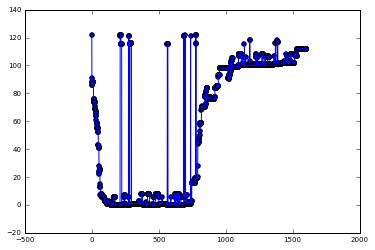

In [13]:
from collections import Counter

# Plot the number of gaps by position
num_gaps = []
for pos in range(coi5p_aln.get_alignment_length()):
    ntcounts = Counter(coi5p_aln[:,pos])
    if '-' in ntcounts.keys():
        num_gaps.append(ntcounts['-'])
    else:
        num_gaps.append(0)
        
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(range(len(num_gaps)), num_gaps)
plt.plot(num_gaps)

In [21]:
# Because the sequence data alignments are:
# 1. non-overlapping
# 2. highly variable in length,
# I think the best way to define distance is as such:
# - Compare every position in the alignment.
# - Increment distance by 1 if and only if both positions are not gaps and are different.
# - Normalize distance by taking distance/len(smaller_18S)

# Read in the alignment but this time using SeqIO.
COI5P_sequences = AlignIO.read('host_COI5P.fasta_aligned.fasta', 'fasta')

host_sequence = dict()
for s in COI5P_sequences:
    host = s.id.replace('_', ' ')
    host_sequence[host] = s

host_sequence

{'American Black Duck': SeqRecord(seq=Seq('------------------------------------------------------...---', SingleLetterAlphabet()), id='American_Black_Duck', name='American_Black_Duck', description='American_Black_Duck', dbxrefs=[]),
 'American Green-Winged Teal': SeqRecord(seq=Seq('------------------------------------------------------...---', SingleLetterAlphabet()), id='American_Green-Winged_Teal', name='American_Green-Winged_Teal', description='American_Green-Winged_Teal', dbxrefs=[]),
 'American Wigeon': SeqRecord(seq=Seq('------------------------------------------------------...---', SingleLetterAlphabet()), id='American_Wigeon', name='American_Wigeon', description='American_Wigeon', dbxrefs=[]),
 'Babbler': SeqRecord(seq=Seq('-ATGACATTCGTCAACCGATGACTATTCTCAACCAACCACAAAGACATCGGTAC...---', SingleLetterAlphabet()), id='Babbler', name='Babbler', description='Babbler', dbxrefs=[]),
 'Baikal Teal': SeqRecord(seq=Seq('------------------------------------------------------...---', Single

In [22]:
for j in range(len(host_sequence.keys())):
    s1 = host_sequence[host_sequence.keys()[12]]
    s2 = host_sequence[host_sequence.keys()[j]]

    s1_ug = s1.seq.ungap('-')
    s2_ug = s2.seq.ungap('-')

    dist = 0
    for i in range(len(s1)):
        l1 = s1[i]
        l2=  s2[i]

        if l1 != '-' and l2 != '-' and l1 != l2:
            dist += 1

    print(dist / float(min([len(s1_ug), len(s2_ug)])))

0.535714285714
0.538904899135
0.53637660485
0.53637660485
0.511837655017
0.502493765586
0.485523385301
0.481243301179
0.533950617284
0.54012345679
0.520172910663
0.215789473684
0.0
0.530259365994
0.493333333333
0.6
0.524495677233
0.493333333333
0.541428571429
0.538904899135
0.502222222222
0.497536945813
0.598245614035
0.50985915493
0.595614035088
0.463
0.585964912281
0.595614035088
0.639473684211
0.450203252033
0.529411764706
0.605263157895
0.519201228879
0.515312916112
0.515312916112
0.588596491228
0.505361930295
0.485523385301
0.492204899777
0.49075215783
0.594736842105
0.462332301342
0.527027027027
0.488621151272
0.518867924528
0.527777777778
0.538580246914
0.538580246914
0.513100436681
0.549467275495
0.538580246914
0.535234899329
0.530935251799
0.539244186047
0.6
0.509433962264
0.524861878453
0.506681514477
0.509433962264
0.534626038781
0.527777777778
0.527896995708
0.502493765586
0.514246947083
0.527528809219
0.450459652707
0.485013623978
0.578947368421
0.539244186047
0.4919653893

In [23]:
# hosts_18s[hosts_18s['Genbank ID'] == host_sequence.keys()[19]]

In [24]:
import networkx as nx

G = nx.read_gpickle('20141103 All IRD Final Graph.pkl')

def clean_host_species(host_species):
    if '/' in host_species:
        host_species = host_species.split('/')[0]
        
    return host_species

def generate_random_polynucleotide(length):
    from random import choice
    from Bio.SeqRecord import SeqRecord
    from Bio.Seq import Seq
    polynt = ''
    for i in range(length):
        polynt = polynt + '-'
    seqrec = SeqRecord(Seq(polynt))
    return seqrec

# Add in the 18S rRNA sequence to each node, if available.
for n, d in G.nodes(data=True):
    host_species = clean_host_species(d['host_species'])
    
    if host_species in host_sequence.keys():
        G.node[n]['18s_rRNA_sequence'] = host_sequence[host_species]
    else:
        G.node[n]['18s_rRNA_sequence'] = generate_random_polynucleotide(COI5P_sequences.get_alignment_length())

In [25]:
G.node[n]

{'18s_rRNA_sequence': SeqRecord(seq=Seq('-AT----------------------------------------------GACCC...---', SingleLetterAlphabet()), id='Human', name='Human', description='Human', dbxrefs=[]),
 'collection_date': Timestamp('2009-11-20 00:00:00'),
 'country': 'Germany',
 'host_species': 'Human',
 'state': 'Bonn',
 'subtype': 'H1N1'}

In [26]:
def compute_distance(seqrecord1, seqrecord2):
    smaller_length = min([len(seqrecord1.seq.ungap('-')), len(seqrecord2.seq.ungap('-'))])
    
    distance = 0
    for i in range(len(seqrecord1.seq)):
        l1 = seqrecord1.seq[i]
        l2 = seqrecord2.seq[i]
        
        if l1 != '-' and l2 != '-' and l1 != l2:
            distance += 1
            
    if smaller_length == 0:
        return 1
    else:
        return float(distance) / smaller_length

def host_phylogenetic_distance(G, n1, n2):
    """
    Compare two nodes' phylogenetic distance.
    """
    from Bio.SeqRecord import SeqRecord
    rrna_1 = G.node[n1]['18s_rRNA_sequence']
    rrna_2 = G.node[n2]['18s_rRNA_sequence']
    
    assert isinstance(rrna_1, SeqRecord), '{0} does not have a valid rRNA sequence.'.format(n1)
    assert isinstance(rrna_2, SeqRecord), '{0} does not have a valid rRNA sequence.'.format(n2)
    
    return compute_distance(rrna_1, rrna_2)

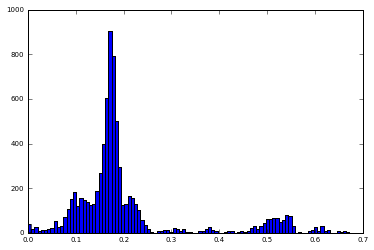

In [27]:
from itertools import combinations

distances = []
for s1, s2 in combinations(host_sequence.values(), 2):
#     print(compute_distance(s1, s2),  s1.description, s2.description)
    distances.append(compute_distance(s1,s2))
    
plt.hist(distances, bins=100)
plt.show()

In [28]:
G.edges(data=True)[0]

('A/mallard/Interior Alaska/6MP0160AR1/2006',
 'A/green-winged teal/Interior Alaska/6MP1077/2006',
 {'edge_type': 'full_complement',
  'pwi': 7.7231860000000001,
  'segments': {1: 0.99085800000000002,
   2: 0.88994799999999996,
   3: 0.90987300000000004,
   4: 0.99942500000000001,
   5: 0.93408000000000002,
   6: 1.0,
   7: 0.99900199999999995,
   8: 1.0}})

In [29]:
# Compute distribution of phylo distances across reassortant vs. whole genome edges.
# Perform 2-sample KS test to see if they are different.
# Ignore the following:

def count_delta_phyloD(G):

    reassortant_phyloD = []
    full_complement_phyloD = []

    for sc, sk, d in G.edges(data=True):
        sc_18s = G.node[sc]['18s_rRNA_sequence'].seq.ungap('-')
        sk_18s = G.node[sk]['18s_rRNA_sequence'].seq.ungap('-')

        if len(sc_18s) != 0 and len(sk_18s) != 0:
            dist = host_phylogenetic_distance(G, sc, sk)
            if d['edge_type'] == 'reassortant':
                reassortant_phyloD.append(dist)

            elif d['edge_type'] == 'full_complement':
                full_complement_phyloD.append(dist)
                
    return reassortant_phyloD, full_complement_phyloD

In [30]:
reassortant_phyloD, full_complement_phyloD = count_delta_phyloD(G)

[ 2690.   544.    72.   134.   236.   284.    34.     0.     0.     0.]
[ 14854.    279.     29.     40.    600.    372.     50.      0.      0.
      0.]
[ 0.15332877  0.66099635  0.71287129  0.77011494  0.28229665  0.43292683
  0.4047619          nan         nan         nan]
[ 0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]


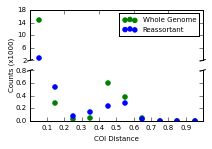

In [325]:
len(reassortant_phyloD)

import numpy as np

bins = np.arange(0,1.1,0.1)

reassortant_binned = np.histogram(reassortant_phyloD, bins=bins)[0].astype(float)
full_complement_binned = np.histogram(full_complement_phyloD, bins=bins)[0].astype(float)

print(reassortant_binned)
print(full_complement_binned)

proportion_reassortant = reassortant_binned / (full_complement_binned + reassortant_binned)

print(proportion_reassortant)

xpoints = np.arange(0,1,0.1)+0.05
print(xpoints)
# plt.plot(reassortant_binned / (full_complement_binned + reassortant_binned))
fig = plt.figure(figsize=(3,2))

ax0 = fig.add_subplot(111)
ax0.xaxis.set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.set_yticklabels([])

ax1 = fig.add_subplot(211)
ax1.scatter(xpoints, full_complement_binned, color='green', label='Whole Genome')
ax1.scatter(xpoints, reassortant_binned, color='blue', label='Reassortant')
ax1.set_ylim(2000, 16000)
ax1.set_yticks(np.arange(2000, 18001, 4000))
ax1.set_yticklabels(np.arange(2, 19, 4))
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')

ax2 = fig.add_subplot(212)
ax2.scatter(xpoints, full_complement_binned, color='green', label='Whole Genome')
ax2.scatter(xpoints, reassortant_binned, color='blue', label='Reassortant')
ax2.set_ylim(0, 800)
ax2.set_yticks(np.arange(0, 801, 200))
ax2.set_yticklabels(np.arange(0,0.9,0.2))
ax2.spines['top'].set_visible(False)
ax2.xaxis.tick_bottom()
ax2.set_xticks(np.arange(0,1.1,0.1))

ax0.set_ylabel('Counts (x1000)\n')
ax2.set_xlabel('COI Distance')

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax1.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal


ax1.legend()
plt.subplots_adjust(left=0.15, bottom=0.18, right=0.95, top=0.95)
plt.savefig('PhyloD Edges Per Bin.pdf')

In [32]:
# Chi-squared test. Groups are:
#                  | 18S same | 18S diff|
# ---------------------------------------
# reassortant      |    1     |    2    |
# ---------------------------------------
# non-reassortant  |    3     |    4    |

from scipy.stats import chi2_contingency

data = np.zeros((2,2))
data[0,0] = Counter(reassortant_phyloD)[0]
data[0,1] = sum([v for k, v in Counter(reassortant_phyloD).items() if k != 0])
data[1,0] = Counter(full_complement_phyloD)[0]
data[1,1] = sum([v for k, v in Counter(full_complement_phyloD).items() if k != 0])
from scipy.stats import chi2_contingency
chi2_contingency(data) 


(3806.2853726335838, 0.0, 1, array([[  3146.52448313,    847.47551687],
        [ 12781.47551687,   3442.52448313]]))

In [33]:
len(full_complement_phyloD)

16224

In [34]:
from scipy.stats import ks_2samp

ks_2samp(sorted(reassortant_phyloD), full_complement_phyloD)
ks_2samp(sorted(full_complement_phyloD), reassortant_phyloD)

(0.44577551114640401, 0.0)

In [35]:
# Define the "proportion non-identical" over all reassortant and full_complement edges. 

def proportion_nonidentical(list_of_phyloD_values):
    return 1 - float(Counter(list_of_phyloD_values)[0.0]) / sum(Counter(list_of_phyloD_values).values())
proportion_nonidentical(reassortant_phyloD)

0.5698547821732599

In [36]:
proportion_nonidentical(full_complement_phyloD)

0.12413708086785014

In [37]:
ratio = proportion_nonidentical(reassortant_phyloD)/proportion_nonidentical(full_complement_phyloD)
# pd.DataFrame([ratio]).to_csv('ratio_identical_nonidentical.csv')

30 April 2015

Reassortment is more highly represented when there is a phylogenetic difference between the host species than when there isn't.

Phylogenetic difference is defined by the 18S rRNA. 

What if we used cytochrome C oxidase?

In [38]:
np.shape(bins)

(11,)

In [48]:
def permute_18s(G):
    """
    Be sure to pass in a copy of G, and not the original!
    Takes in a graph G, shuffles the labels, and returns G with shuffled labels.
    """
    from random import shuffle
    rrna_labels = [d['18s_rRNA_sequence'] for n, d in G.nodes(data=True)]
    shuffle(rrna_labels)
    
    for i, n in enumerate(G.nodes()):
        G.node[n]['18s_rRNA_sequence'] = rrna_labels[i]
        
    return G

shuffledG = G.copy()

expected_reassort = []

from time import time

bins = np.arange(0,1.1,0.1)

data = np.zeros(shape=(100, 10))

In [ ]:
for i in range(1): # changed to 100 in script format.
    start_time = time()
    shuffledG = permute_18s(shuffledG)
    reassortant_shuffled_phyloD, full_complement_shuffled_phyloD = count_delta_phyloD(shuffledG)
    
    reassortant_shuffled_binned = np.histogram(reassortant_shuffled_phyloD, bins=bins)[0].astype(float)
    full_complement_shuffled_binned = np.histogram(full_complement_shuffled_phyloD, bins=bins)[0].astype(float)
    
    expected_proportion_reassortant = reassortant_shuffled_binned / (full_complement_shuffled_binned + reassortant_shuffled_binned)
    
    end_time = time()
    
    data[i] = expected_proportion_reassortant
    
    print('Round {0}, time: {1} s'.format(i, end_time - start_time))

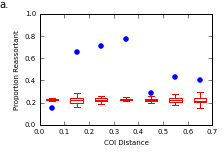

In [272]:
# pd.DataFrame(data).fillna(0).to_csv('phylod_expected_reassortant_fraction.csv')

# Read in the data from running the above cells on Rous.
expected_shuffled = pd.read_csv('phylod_expected_reassortant_fraction.csv', index_col=0)
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)

bp = ax.boxplot(expected_shuffled.values, showfliers=False)
plt.setp(bp['boxes'], color='red')
plt.setp(bp['whiskers'], color='red')
plt.setp(bp['fliers'], color='red')
plt.setp(bp['caps'], color='red')
plt.setp(bp['medians'], color='red')

xpoints = np.arange(1, 11, 1)
ax.scatter(xpoints, proportion_reassortant, color='blue')
# ax.plot(xpoints, proportion_reassortant, color='blue', linestyle='dashed', label='Proportion\nReassortant')
ax.set_ylabel('Proportion Reassortant')
ax.set_ylim(0, 1)
ax.set_xlabel('COI Distance')
ax.set_xticks(np.arange(1,13,1)-0.5)
ax.set_xticklabels(np.arange(0,1.1,0.1))
ax.set_xlim(0.5, 7.5)
# ax2 = ax.twinx()

# ax2.scatter(xpoints, reassortant_binned, color='green')
# ax2.plot(xpoints, reassortant_binned, color='green', label='Reassortant')
# ax2.scatter(xpoints, full_complement_binned, color='blue')
# ax2.plot(xpoints, full_complement_binned, color='blue', label='Whole Genome')
# ax2.set_yscale('linear')
# ax2.set_yticks(np.arange(0, 17000, 4000))
# ax2.set_yticklabels(np.arange(0,17,4))
# ax2.set_ylabel('Counts (x1000)')

lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend() 
ax.annotate('a.', xy=(0,1), xycoords='figure fraction', ha='left', va='top')

plt.subplots_adjust(left=0.15, bottom=0.18, right=0.95, top=0.95)
plt.savefig('Phylogenetic Susceptibility and Reassortment.pdf')

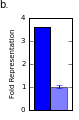

In [145]:
# Plot proportion non-identical vs. identical ratio
import numpy as np
simulated = pd.read_csv('ratio_identical_nonidentical_expected.csv', index_col=0)
actual = pd.read_csv('ratio_identical_nonidentical.csv', index_col=0)

mean = simulated.mean().values
ci99 = simulated.std() * 3
ci99 = ci99.values

barwidth = 0.3

fig = plt.figure(figsize=(1, 1.5))
ax = fig.add_subplot(111)
ax.bar(1, mean, width=barwidth, yerr=ci99, color='blue', alpha=0.5, label='Shuffled')
ax.bar(1-barwidth, actual.values, width=barwidth, color='blue', label='Data')
ax.set_ylabel('Fold Representation')
ax.set_xticks([])
ax.set_yticks(np.arange(0,5,1))
ax.annotate('b.', xy=(0,1), xycoords='figure fraction', ha='left', va='top')
plt.subplots_adjust(left=0.3, bottom=0.05)
plt.savefig('PhyloD Reassortant Fold Over-Representation.pdf')

In [186]:
# Plot viral PWD against host PWD
viral_pwd_reassortant = []
viral_pwd_full = []
host_pwd_reassortant = []
host_pwd_full = []
# edge_reassortant_status = []
for sc, sk, d in G.edges(data=True):
    sc_18s = G.node[sc]['18s_rRNA_sequence'].seq.ungap('-')
    sk_18s = G.node[sk]['18s_rRNA_sequence'].seq.ungap('-')

    if len(sc_18s) != 0 and len(sk_18s) != 0:
        dist = host_phylogenetic_distance(G, sc, sk)
        
    viral_pwd.append(d['pwi'])
    host_pwd.append(dist)
    if d['edge_type'] == 'full_complement':
        viral_pwd_full.append(d['pwi'])
        host_pwd_full.append(dist)
    if d['edge_type'] == 'reassortant':
        viral_pwd_reassortant.append(d['pwi'])
        host_pwd_reassortant.append(dist)

In [263]:
print(8 - np.mean(viral_pwd_reassortant))
print(8 - np.mean(viral_pwd_full))

0.217789847297
0.0464142040183


In [264]:
print(np.mean(host_pwd_reassortant))
print(np.mean(host_pwd_full))

0.108648024888
0.0386266956976


In [269]:
(sum(Counter(host_pwd_full).values()) - Counter(host_pwd_full)[0]) / float(Counter(host_pwd_full)[0])

0.1617492787831104

In [270]:
(sum(Counter(host_pwd_reassortant).values()) - Counter(host_pwd_reassortant)[0]) / float(Counter(host_pwd_reassortant)[0])

1.048240411229735

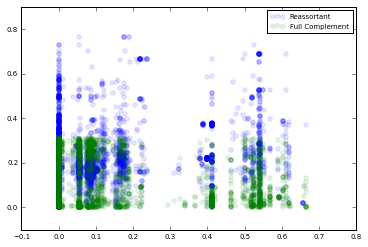

In [262]:
# plt.hist2d
from matplotlib.colors import LogNorm 

fig = plt.figure()#figsize=(3,2))
ax = fig.add_subplot(111)
ax.scatter(host_pwd_reassortant, 8 - np.array(viral_pwd_reassortant), color='blue', label='Reassortant', alpha=0.1)
ax.scatter(host_pwd_full, 8 - np.array(viral_pwd_full), color='green', label='Full Complement', alpha=0.1)
ax.legend()

In [210]:
from scipy.stats import linregress

slope_r, intercept_r, r_value_r, p_value_r, std_error_r = linregress(8 - np.array(viral_pwd_reassortant), host_pwd_reassortant)
slope_f, intercept_f, r_value_f, p_value_f, std_error_f = linregress(8 - np.array(viral_pwd_full), host_pwd_full)

In [216]:
print(slope_r, slope_f)
print(r_value_r**2, r_value_f**2)
print(p_value_r, p_value_f)
print(std_error_r, std_error_f)

(0.33721284970380055, 0.20951452548895069)
(0.060380529433973366, 0.018443129483800953)
(4.2251496620528251e-72, 1.0633929164402235e-73)
(0.018486327289159835, 0.011483108571926186)


(array([ 3011.,   903.,   415.,    81.,     6.,   135.,   224.,   128.,
          227.,    50.]),
 array([ 0.        ,  0.06645327,  0.13290653,  0.1993598 ,  0.26581306,
         0.33226633,  0.39871959,  0.46517286,  0.53162612,  0.59807939,
         0.66453265]),
 <a list of 10 Patch objects>)

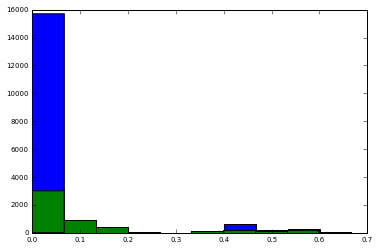

In [221]:
# plt.scatter([0] * len(host_pwd_full), host_pwd_full, alpha=0.1, color='green')
# plt.scatter([1] * len(host_pwd_reassortant), host_pwd_reassortant, alpha=0.1, color='blue')
plt.hist(host_pwd_full)
plt.hist(host_pwd_reassortant)

In [222]:
# Add in ecotype information

# Load the data
df = pd.read_csv('Country-Species_to_be_Coded_by_Nichola.csv', index_col=0)
df['Habitat/setting'] = df['Habitat/setting'].replace('Domestic ', 'Domestic')
# Make it into a dicitonary where each entry is (country, species):habitat/setting
ecotype_map = dict()

for row, data in df.iterrows():
    country = data['Country']
    species = data['Species']
    ecotype = data['Habitat/setting']

    ecotype_map[(country, species)] = ecotype

# Add the ecotype into each node.
for n, d in G.nodes(data=True):
    country = d['country']
    species = d['host_species']
    if '/' in species:
        species = species.split('/')[0]
    if 'null' in species:
        species = 'Unknown'


    
    G.node[n]['ecotype'] = ecotype_map[(country, species)]

In [256]:
def correct_metadata(G, node):
    """
    Helper function for providing the correct subtype graph metadata.    
    """
    d = G.node[node]
    subtype = d['subtype']
    ecotype = d['ecotype']
    host = d['host_species']
    if ecotype == 'Unknown':
        ecotype = 'W'
    if host == 'Human':
        ecotype = 'H'
    if ecotype == 'Domestic':
        ecotype = 'D'
    if ecotype == 'Wild':
        ecotype = 'W'
    subtype = subtype + '::' + ecotype
    
    return ecotype, subtype, host
    

In [259]:
from collections import Counter, defaultdict
transition_hostpd_reassortant = defaultdict(list)
transition_hostpd_full = defaultdict(list)
# Plot the number of ecotype jumps detected.
for sc, sk, d in G.edges(data=True):
    sc_ecotype, sc_subtype, sc_host = correct_metadata(G, sc)
    sk_ecotype, sk_subtype, sk_host = correct_metadata(G, sk)

    sc_18s = G.node[sc]['18s_rRNA_sequence'].seq.ungap('-')
    sk_18s = G.node[sk]['18s_rRNA_sequence'].seq.ungap('-')


    transition = sc_ecotype + '::' + sk_ecotype
    if len(sc_18s) != 0 and len(sk_18s) != 0:
        dist = host_phylogenetic_distance(G, sc, sk)
        if d['edge_type'] == 'reassortant':
            transition_hostpd_reassortant[transition].append(dist)
        else:
            transition_hostpd_full[transition].append(dist)

809
210
136
111
11
2
374
33
2308
2710
45
129
576
10613
10
155
3
1983


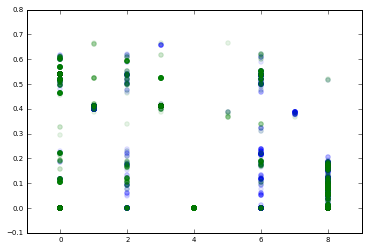

In [261]:
transition_hostpd_means = defaultdict(list)
for k, v in transition_hostpd.items():
    transition_hostpd_means[k] = np.mean(v)

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.bar(np.arange(len(transition_hostpd_means.keys()))-0.5, transition_hostpd_means.values())
# ax.set_xticks(np.arange(len(transition_hostpd_means.keys())))
# ax.set_xticklabels(transition_hostpd_means.keys())
dataset = sorted(transition_hostpd_reassortant.items(), key=lambda x:x[0])
compiled = []
for i, (transition, hostpds) in enumerate(dataset):
    #np.array(hostpds)
    compiled.append(np.array(hostpds))
    print(len(np.array(hostpds)))
    ax.scatter([i] * len(hostpds), hostpds, alpha=0.1, color='blue')
    
dataset = sorted(transition_hostpd_full.items(), key=lambda x:x[0])
compiled = []
for i, (transition, hostpds) in enumerate(dataset):
    #np.array(hostpds)
    compiled.append(np.array(hostpds))
    print(len(np.array(hostpds)))
    ax.scatter([i] * len(hostpds), hostpds, alpha=0.1, color='green')
    

